# PREPARACION DE DATOS

# Preparación de datos -  Empleados



1. Integración de los datos

2. Eliminar variables irrelevantes y redundantes

3. Descripción estadística de los datos

4. Limpieza de datos

5. Análisis de correlaciones

6. Balanceo de datos

7. Transformación de tipo de variable según el método de ML

8. Guardar los datos preparados


In [2]:
#IMPORTAR LIBRERIAS
import pandas as pd #manipulacion de datos
import numpy as np #matrices y vectores
import matplotlib.pyplot as plt #grafica

INTEGRACION DE DATOS


In [10]:
data = pd.read_csv("Preparacion_datos_empleados.csv", encoding='utf-8', delimiter=';')
data.head()

,ID,Sueldo,Casado,Carro,Hijos,Casa,Incapacidades,Antiguedad,Sexo,Fuga
0,1,10000,Sí,No,0,Alquiler,7,15.0,H,No
1,2,20000,No,Sí,1,Alquiler,3,3.0,M,Sí
2,3,15000,Sí,Sí,2,Prop,5,10.0,H,Sí
3,4,30000,Sí,Sí,1,Alquiler,15,7.0,M,No
4,5,10000,Sí,Sí,0,Prop,1,6.0,H,Sí


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1080 non-null   int64  
 1   Sueldo         1080 non-null   int64  
 2   Casado         1080 non-null   object 
 3   Carro          1079 non-null   object 
 4   Hijos          1080 non-null   int64  
 5   Casa           1080 non-null   object 
 6   Incapacidades  1080 non-null   int64  
 7   Antiguedad     1078 non-null   float64
 8   Sexo           1080 non-null   object 
 9   Fuga           1080 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 84.5+ KB


In [11]:
#Corrección del tipo de datos object a categorías

data['Casado']=data['Casado'].astype('category')
data['Carro']=data['Carro'].astype('category')
data['Casa']=data['Casa'].astype('category')
data['Sexo']=data['Sexo'].astype('category')
data['Fuga']=data['Fuga'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             1080 non-null   int64   
 1   Sueldo         1080 non-null   int64   
 2   Casado         1080 non-null   category
 3   Carro          1079 non-null   category
 4   Hijos          1080 non-null   int64   
 5   Casa           1080 non-null   category
 6   Incapacidades  1080 non-null   int64   
 7   Antiguedad     1078 non-null   float64 
 8   Sexo           1080 non-null   category
 9   Fuga           1080 non-null   category
dtypes: category(5), float64(1), int64(4)
memory usage: 48.2 KB


In [12]:
#Revisamos si tenemos ID repetidos

ids = data['ID'].value_counts()

ids[ids > 1]

48    2
Name: ID, dtype: int64

In [13]:
#Sólo dejamos el id mas reciente

data.drop_duplicates(subset=['ID'], keep='last', inplace=True)

ids = data['ID'].value_counts()

ids[ids > 1]

Series([], Name: ID, dtype: int64)

ELIMINAR VARIABLES IRRELEVANTES O REDUNDANTES

In [14]:
# Variables irrelevantes para el proceso de minería

data = data.drop('ID',axis=1) #Eliminamos el ID por ser irrelevante, axis=1 indica que es una columna

data.head()


,Sueldo,Casado,Carro,Hijos,Casa,Incapacidades,Antiguedad,Sexo,Fuga
0,10000,Sí,No,0,Alquiler,7,15.0,H,No
1,20000,No,Sí,1,Alquiler,3,3.0,M,Sí
2,15000,Sí,Sí,2,Prop,5,10.0,H,Sí
3,30000,Sí,Sí,1,Alquiler,15,7.0,M,No
4,10000,Sí,Sí,0,Prop,1,6.0,H,Sí


DESCRIPCION ESTADISTICA

In [15]:
data.describe()

,Sueldo,Hijos,Incapacidades,Antiguedad
count,1079.000000,1079.000000,1079.000000,1077.000000
mean,21072.289157,0.732159,5.634847,8.183844
std,11900.576117,0.997954,13.842546,5.251978
min,8000.000000,0.000000,0.000000,1.000000
25%,10000.000000,0.000000,1.000000,5.000000
50%,20000.000000,0.000000,3.000000,7.000000
75%,30000.000000,2.000000,7.000000,12.000000
max,50000.000000,3.000000,400.000000,20.000000


<AxesSubplot:>

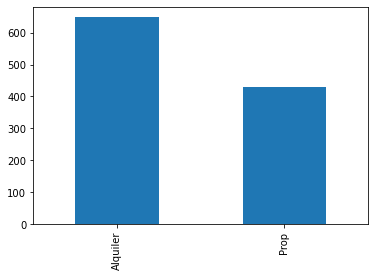

In [16]:
data['Casa'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Sexo'>

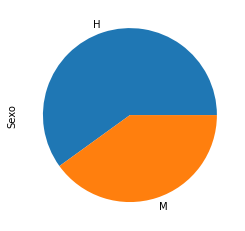

In [17]:
data['Sexo'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Fuga'>

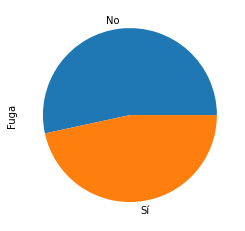

In [18]:
data['Fuga'].value_counts().plot(kind='pie')

<AxesSubplot:>

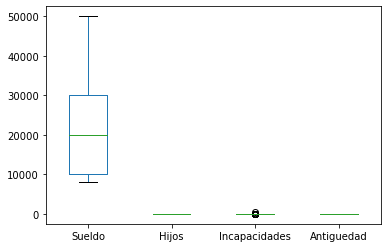

In [19]:
data.plot.box()

<AxesSubplot:>

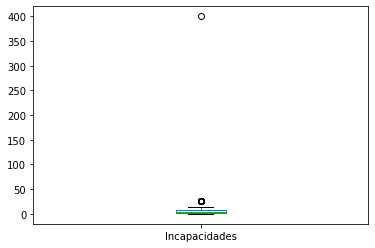

In [20]:
data['Incapacidades'].plot.box()

<AxesSubplot:>

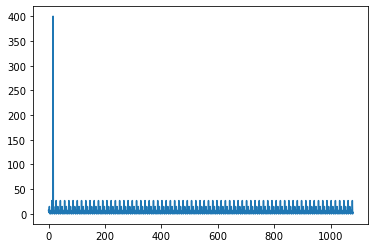

In [21]:
data['Incapacidades'].plot.line()


4. LIMPIEZA DE DATOS ATIPICOS Y NULOS

In [22]:
data.Incapacidades[data["Incapacidades"]>365] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sueldo         1079 non-null   int64   
 1   Casado         1079 non-null   category
 2   Carro          1078 non-null   category
 3   Hijos          1079 non-null   int64   
 4   Casa           1079 non-null   category
 5   Incapacidades  1078 non-null   float64 
 6   Antiguedad     1077 non-null   float64 
 7   Sexo           1079 non-null   category
 8   Fuga           1079 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 48.0 KB


<ipython-input-22-6e20c2a7f387>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Incapacidades[data["Incapacidades"]>365] = np.nan


In [23]:
#Limpieza de datos nulos: Imputación por la media y moda

from sklearn.impute import SimpleImputer



#Imputacion de variables numéricas

ImpNumeros = SimpleImputer(missing_values=np.nan, strategy='mean')

data[['Incapacidades', 'Antiguedad']] = ImpNumeros.fit(data[['Incapacidades', 'Antiguedad']]).transform(data[['Incapacidades', 'Antiguedad']])



#Imputacion de variables categóricas

ImpCategorias = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data[['Carro']] = ImpCategorias.fit(data[['Carro']]).transform(data[['Carro']])



data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079 entries, 0 to 1079
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Sueldo         1079 non-null   int64   
 1   Casado         1079 non-null   category
 2   Carro          1079 non-null   object  
 3   Hijos          1079 non-null   int64   
 4   Casa           1079 non-null   category
 5   Incapacidades  1079 non-null   float64 
 6   Antiguedad     1079 non-null   float64 
 7   Sexo           1079 non-null   category
 8   Fuga           1079 non-null   category
dtypes: category(4), float64(2), int64(2), object(1)
memory usage: 55.3+ KB


In [24]:
#Valores de la imputación

print(ImpNumeros.statistics_)

print(ImpCategorias.statistics_)

[5.2690167  8.18384401]
['Sí']


5. CORRELACIONES DE VARIABLES


In [25]:
data.corr()

,Sueldo,Hijos,Incapacidades,Antiguedad
Sueldo,1.000000,-0.087881,0.015256,0.524060
Hijos,-0.087881,1.000000,-0.008963,-0.043380
Incapacidades,0.015256,-0.008963,1.000000,-0.165031
Antiguedad,0.524060,-0.043380,-0.165031,1.000000


In [26]:
# Todas las variables deben ser numéricas para calcular las correlaciones

# Se crean dummies para las variables predictoras



data_num = pd.get_dummies(data, drop_first=True)

data_num.head()


,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
0,10000,0,7.0,15.0,1,0,0,0,0
1,20000,1,3.0,3.0,0,1,0,1,1
2,15000,2,5.0,10.0,1,1,1,0,1
3,30000,1,15.0,7.0,1,1,0,1,0
4,10000,0,1.0,6.0,1,1,1,0,1


In [27]:
data_num.corr()

,Sueldo,Hijos,Incapacidades,Antiguedad,Casado_Sí,Carro_Sí,Casa_Prop,Sexo_M,Fuga_Sí
Sueldo,1.000000,-0.087881,0.015256,0.524060,-0.274629,-0.262250,-0.267433,0.613286,-0.083459
Hijos,-0.087881,1.000000,-0.008963,-0.043380,0.651359,0.441850,0.626839,-0.326711,-0.287339
Incapacidades,0.015256,-0.008963,1.000000,-0.165031,0.041303,-0.329772,-0.250156,0.404871,-0.445000
Antiguedad,0.524060,-0.043380,-0.165031,1.000000,0.166386,-0.207729,-0.033573,-0.004053,-0.033465
Casado_Sí,-0.274629,0.651359,0.041303,0.166386,1.000000,0.259807,0.599620,-0.490593,-0.340706
Carro_Sí,-0.262250,0.441850,-0.329772,-0.207729,0.259807,1.000000,0.490941,-0.124544,0.264012
Casa_Prop,-0.267433,0.626839,-0.250156,-0.033573,0.599620,0.490941,1.000000,-0.388352,0.053406
Sexo_M,0.613286,-0.326711,0.404871,-0.004053,-0.490593,-0.124544,-0.388352,1.000000,0.055410
Fuga_Sí,-0.083459,-0.287339,-0.445000,-0.033465,-0.340706,0.264012,0.053406,0.055410,1.000000


<AxesSubplot:>

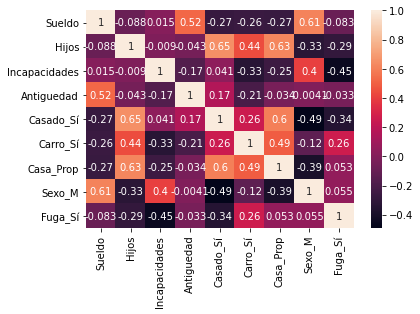

In [28]:
import seaborn as sns

sns.heatmap(data_num.corr(),annot=True)